In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = 'True'
os.environ["TF_CPP_MIN_LOG_LEVEL"] = '2'

In [3]:
df = pd.read_csv("data/points_xor.csv")
data_train = df[["x1", "x2"]]
class_train = df["class"]
print(data_train.shape)
print(class_train.shape)

(4, 2)
(4,)


### ニュートラルネットワークの意味
Sequentialクラスを使用してニュートラルネットワークの構造を定義  
.add：modelに各層のニューロンを追加  
Dense：ニューロンを配置する関数

In [4]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation="sigmoid"))

### トレーニング
#### compileで学習用の設定を行う
- optimizer: $\;$最適化法 $\;\;\;$例 sgd$\;\;\;$(確率的勾配降下法)
- loss:$\;\;\;\;\;\;\;\;\;$誤差関数 $\;\;\;$例 binary_crossentropy
- metrics:  $\;\;\;$ 評価関数 $\;\;\;$例 accuracy
#### 誤差が小さくなるように重み$w$と闘値$\theta$を最適化
- model.fit(data_train, class_train, epochs=1000, batch_size=1)  
  - data_train: 入力値
  - class_train: 教師信号
  - epochs: 反復更新回数
  - batch_size: 入力データの個数

In [5]:
%%time
model.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"])
fit_log = model.fit(data_train, class_train, epochs=1000, batch_size=1)

Epoch 1/1000
4/4 [==============================] - 1s 5ms/step - loss: 0.8188 - accuracy: 0.7500
Epoch 2/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.8161 - accuracy: 0.7500
Epoch 3/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.8134 - accuracy: 0.7500
Epoch 4/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.8109 - accuracy: 0.7500
Epoch 5/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.8083 - accuracy: 0.7500
Epoch 6/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.8059 - accuracy: 0.7500
Epoch 7/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.8035 - accuracy: 0.7500
Epoch 8/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.8011 - accuracy: 0.7500
Epoch 9/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7988 - accuracy: 0.7500
Epoch 10/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7966 - accuracy: 0.7500
Epoch 11/1000
4/4 [

### 精度のトレーニング

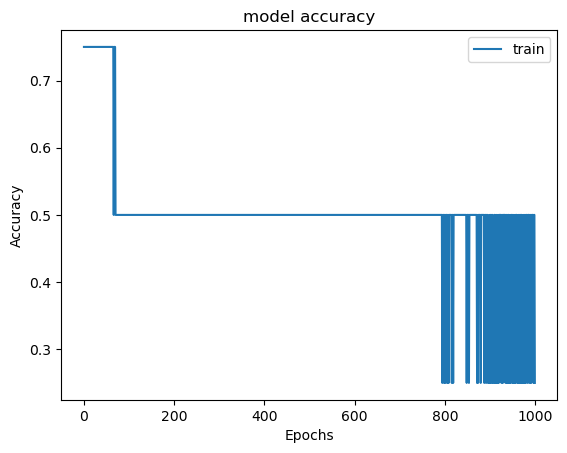

In [6]:
plt.plot(fit_log.history["accuracy"], label="train")
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()
plt.show()

### 予測
学習済みmodelを使用して予測値を算出する

In [7]:
pred = model.predict(data_train)
print(pred)

1/1 [==============================] - 0s 109ms/step
[[0.4700066 ]
 [0.5013028 ]
 [0.48895493]
 [0.5202743 ]]


## (発展)分離超平面の表示

### 分離超平面の設定(教師信号)

In [8]:
t1 = data_train[class_train==1]
t0 = data_train[class_train==0]

t1_x = t1.iloc[:, 0]
t1_y = t1.iloc[:, 1]

t0_x = t0.iloc[:, 0]
t0_y = t0.iloc[:, 1]

### 分離超平面の設定(grid point)

In [9]:
g = pd.read_csv("data/grid01_21x21.csv", header=None)
pred_g = model.predict(g)[:, 0]

g1 = g[pred_g>=0.5]
g0 = g[pred_g<0.5]

g1_x = g1.iloc[:, 0]
g1_y = g1.iloc[:, 1]

g0_x = g0.iloc[:, 0]
g0_y = g0.iloc[:, 1]

14/14 [==============================] - 0s 1ms/step


### 分離超平面

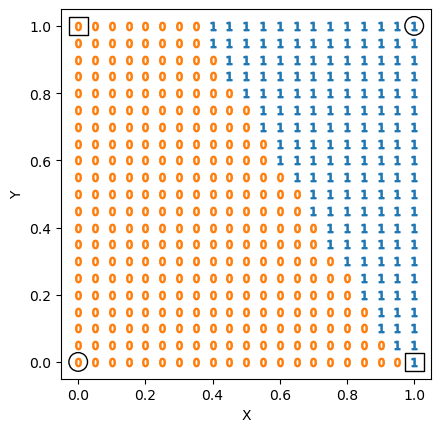

In [10]:
plt.scatter(t1_x, t1_y, marker="s", facecolor="none", edgecolor="black", s=180)
plt.scatter(t0_x, t0_y, marker="o", facecolor="none", edgecolor="black", s=180)

plt.scatter(g1_x, g1_y, marker='$1$')
plt.scatter(g0_x, g0_y, marker='$0$')

plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)

plt.xlabel("X")
plt.ylabel("Y")
plt.show()